In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2 as cv
from tensorflow import keras
from keras.layers.core import Dense
from tensorflow.keras import layers, Input

from keras.layers import InputLayer
from keras.layers import Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
import numpy as np
import os
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
    
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
          
   elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy


In [4]:
def add_distortion(image):
  img = cv.cvtColor(image,cv.COLOR_BGR2RGB)
  img1 = cv.resize(img,(256,256))
  hsv = cv.cvtColor(img1,cv.COLOR_BGR2HSV)
  hsv[...,2] = hsv[...,2] * 0.2
  image1 = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
  return image1
  



In [5]:
def preprocesspipeline(image):
  image_distorted = add_distortion(image)
  image_dn = noisy("s&p",image_distorted)
  # image_final = image_dn.reshape(500,500)
  return image_dn



In [22]:

import glob
from tqdm import tqdm
image_list = []
for filename in tqdm(glob.glob("../content/drive/MyDrive/lightinthedark/images/images/**/*")):
   
    img = mpimg.imread(filename, format = 'jpg')
    #plt.imshow(img)
    image_list.append(img)

100%|██████████| 8800/8800 [00:24<00:00, 355.18it/s]


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# res_imag_list = []
# for i in image_list:
#   res = preprocesspipeline(i)
#   res_imag_list.append(i)
#   X_train = res_imag_list
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [ ]:
Y_train = []


# for i in image_list:
#   img = cv.cvtColor(i,cv.COLOR_BGR2RGB)
#   img1 = cv.resize(img,(256,256))
#   Y_train.append(img1)




In [9]:
X_ = []
y_ = []
for img in image_list:




 
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_y = cv.resize(img,(256,256))
  hsv = cv.cvtColor(img_y, cv.COLOR_BGR2HSV) #convert it to hsv
  hsv[...,2] = hsv[...,2]*0.2
  img_1 = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
  Noisey_img = noisy("s&p",img_1)
  X_.append(Noisey_img)
  y_.append(img_y)
           
X_ = np.array(X_)
y_ = np.array(y_)
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [9]:
X_[0].shape

(256, 256, 3)

In [10]:
y_[0].shape

(256, 256, 3)

In [10]:

from keras.layers import add, Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization, RepeatVector, Reshape


from keras import backend as K
K.clear_session()
def FCN(in_):
  model_1 = Conv2D(3,(3,3),activation = 'relu',padding =  'same',strides = 1)(in_)
  model_1 = Conv2D(16,(3,3),activation = 'relu',padding =  'same',strides = 1)(model_1)
  model_1 = Conv2D(32,(3,3),activation = 'relu',padding =  'same',strides = 1)(model_1)
  model_1_3 = Conv2D(64,(2,2),activation = 'relu',padding =  'same',strides = 1)(model_1)
  model_1 = Conv2D(64,(2,2),activation = 'relu',padding =  'same',strides = 1)(model_1_3)
  


  model_2 = Conv2D(32,(3,3),activation = 'relu',padding =  'same',strides = 1)(in_)
  model_2_0 = Conv2D(32,(3,3),activation = 'relu',padding =  'same',strides = 1)(model_2)
  model_2 = Conv2D(64,(2,2),activation = 'relu',padding =  'same',strides = 1)(model_2_0)
  model_2 = Conv2D(64,(2,2),activation = 'relu',padding =  'same',strides = 1)(model_2)
 
  model_added =  keras.layers.add([model_1,model_2,model_1_3])  #64,2

  model_3 = Conv2D(128,(3,3),activation = 'relu',padding =  'same',strides = 1)(model_added)
  model_3 = Conv2D(64,(3,3),activation = 'relu',padding =  'same',strides = 1)(model_3)
  model_3_0 = Conv2D(64,(3,3),activation = 'relu',padding =  'same',strides = 1)(model_3)
  model_3_1 = Conv2D(32,(3,3),activation = 'relu',padding =  'same',strides = 1)(model_3_0)
  model_3 = Conv2D(32,(3,3),activation = 'relu',padding =  'same',strides = 1)(model_3_1)
  
  model_added2 = keras.layers.add([model_3,model_2_0,model_3_1]) # 32,3

  model_4 = Conv2D(16,(2,2),activation = 'relu',padding =  'same',strides = 1)(model_added2)
  model_4_1 = Conv2D(16,(2,2),activation = 'relu',padding =  'same',strides = 1)(model_4)

  model_added3 = keras.layers.add([model_4,model_4_1]) # 16 ,2
  

  model_5 = Conv2D(16,(2,2),activation = 'relu',padding =  'same',strides = 1)(model_added3)
  model_5 = Conv2D(16,(2,2),activation = 'relu',padding =  'same',strides = 1)(model_5)

  model_5 = Conv2D(3,(3,3), activation='relu',padding='same',strides=1)(model_5)
  
  return model_5

    # model_1 = Conv2D(3,(3,3),activation = 'relu',padding =  'same',strides = 1)(in_)

    # model_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(in_)
    # model_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_1)
    # model_1 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_1)
    
    # model_2 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(in_)
    # model_2 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)
    
    # model_2_0 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)
    
    # model_add = add([model_1,model_2,model_2_0])
    
    # model_3 = Conv2D(64,(3,3), activation='relu',padding='same',strides=1)(model_add)
    # model_3 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_3)
    # model_3 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3)
    
    # model_3_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_add)
    # model_3_1 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3_1)
    
    # model_3_2 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add)
    
    # model_add_2 = add([model_3_1,model_3_2,model_3])
    
    # model_4 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_2)
    # model_4_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add)
    # #Extension
    # model_add_3 = add([model_4_1,model_add_2,model_4])
    
    # model_5 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_3)
    # model_5 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add_3)
    
    # model_5 = Conv2D(3,(3,3), activation='relu',padding='same',strides=1)(model_5)
    
    # return model_5




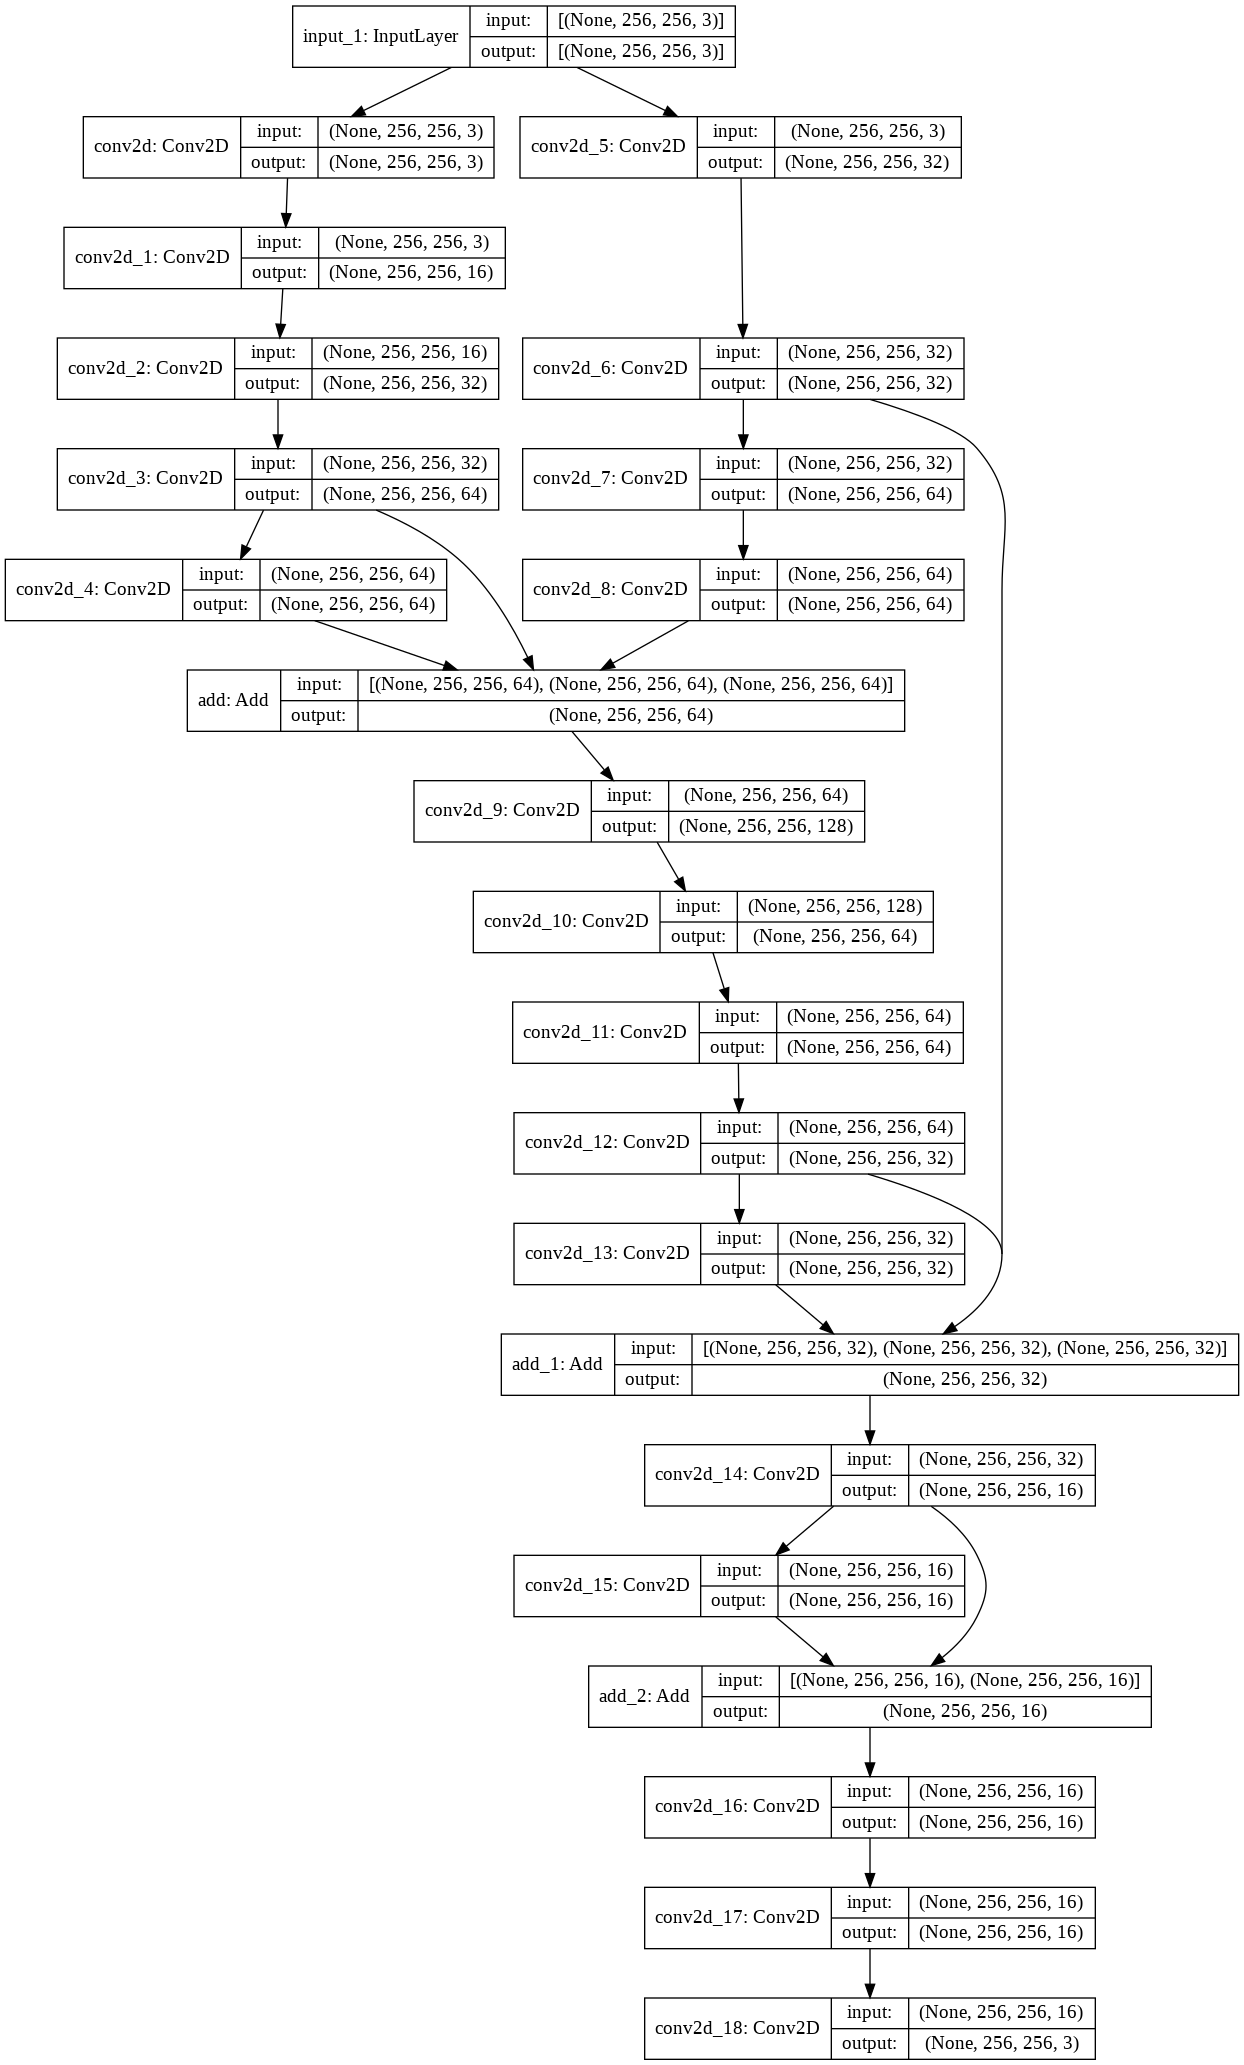

In [12]:

from keras.utils.vis_utils import plot_model
plot_model(Model_Enhancer,to_file='model_.png',show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='model_.png')




In [11]:
Input_Sample = Input(shape=(256, 256,3))
Output_ = FCN(Input_Sample)
Model_Enhancer = Model(inputs=Input_Sample, outputs=Output_)
Model_Enhancer.compile(optimizer="adam", loss='mean_squared_error')
Model_Enhancer.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 3)  84          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 448         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 256, 256, 32) 896         input_1[0][0]                    
______________________________________________________________________________________________

In [13]:
def GenerateInputs(X,y):
    for i in range(len(X)):
        X_input = X[i].reshape(1,256,256,3)
        y_input = y[i].reshape(1,256,256,3)
        yield (X_input,y_input)
Model_Enhancer.fit_generator(GenerateInputs(X_,y_),epochs=53,verbose=1,steps_per_epoch=39,shuffle=True)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/53
39/39 [==============================] - 36s 118ms/step - loss: 8107.7147
Epoch 2/53
39/39 [==============================] - 5s 118ms/step - loss: 851.9453
Epoch 3/53
39/39 [==============================] - 5s 120ms/step - loss: 1034.4214
Epoch 4/53
39/39 [==============================] - 5s 119ms/step - loss: 933.5978
Epoch 5/53
39/39 [==============================] - 5s 118ms/step - loss: 720.6341
Epoch 6/53
39/39 [==============================] - 5s 120ms/step - loss: 381.0634
Epoch 7/53
39/39 [==============================] - 5s 119ms/step - loss: 316.0032
Epoch 8/53
39/39 [==============================] - 5s 119ms/step - loss: 242.9016
Epoch 9/53
39/39 [==============================] - 5s 119ms/step - loss: 269.1992
Epoch 10/53
39/39 [==============================] - 5s 120ms/step - loss: 219.8909
Epoch 11/53
39/39 [==============================] - 5s 119ms/step - loss: 349.7858
Epoch 12/53
39/39 [==============================] - 5s 119ms/step - loss: 186.921

In [14]:
def ExtractTestInput(ImagePath):
    img = cv.imread(ImagePath)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_ = cv.resize(img,(256,256))
    hsv = cv.cvtColor(img_, cv.COLOR_BGR2HSV) #convert it to hsv
    hsv[...,2] = hsv[...,2]*0.2
    img1 = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    Noise = noisy("s&p",img1)
    Noise = Noise.reshape(1,256,256,3)
    return Noise


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


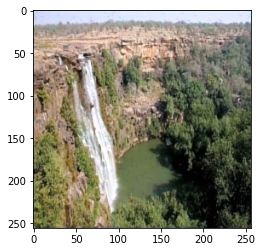

In [15]:



image_for_test = ExtractTestInput("/content/download.jpg")

Prediction = Model_Enhancer.predict(image_for_test)

Prediction = Prediction.reshape(256,256,3)
plt.imshow(Prediction/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


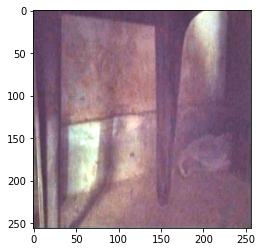

In [23]:
image_for_test = cv.imread("/photo6296439081642601304.jpg")

image_for_test = cv.cvtColor(image_for_test, cv.COLOR_BGR2RGB)
image_for_test = cv.resize(image_for_test,(256,256))
image_for_test = image_for_test.reshape(1,256,256,3)

Prediction = Model_Enhancer.predict(image_for_test)

Prediction = Prediction.reshape(256,256,3)
plt.imshow(Prediction/255)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


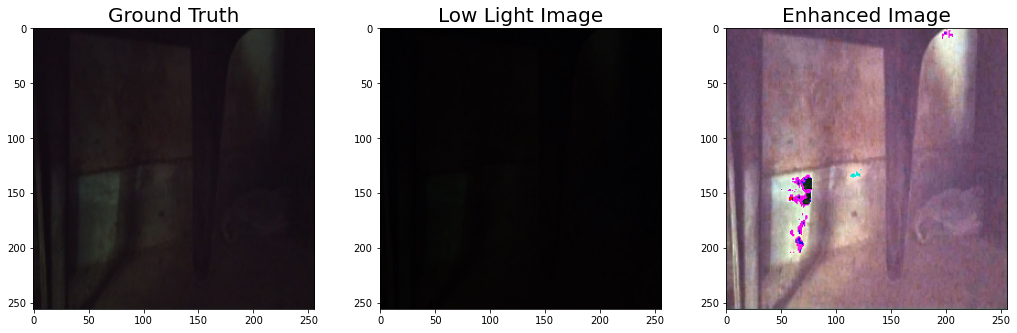

In [24]:
Image_test="/photo6296439081642601304.jpg"
plt.figure(figsize=(30,30))
plt.subplot(5,5,1)
img_1 = cv.imread(Image_test)
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_1 = cv.resize(img_1, (256, 256))
plt.title("Ground Truth",fontsize=20)
plt.imshow(img_1)
plt.subplot(5,5,1+1)
img_ = ExtractTestInput(Image_test)
img_ = img_.reshape(256,256,3)
plt.title("Low Light Image",fontsize=20)
plt.imshow(img_)
plt.subplot(5,5,1+2)
img_[:,:,:] = Prediction[:,:,:]
plt.title("Enhanced Image",fontsize=20)
plt.imshow(img_)

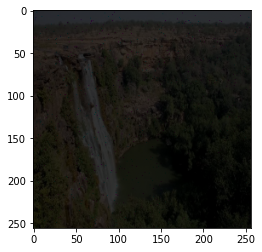

In [17]:
 image_for_test =image_for_test.reshape(256,256,3)
plt.imshow(image_for_test/255)

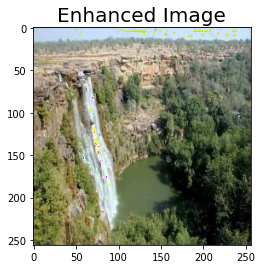

In [64]:
# plt.subplot(5,5,1+2)

image_for_test[:,:,:] = Prediction[:,:,:]
plt.title("Enhanced Image",fontsize=20)
plt.imshow(image_for_test)


In [43]:
Prediction

array([[[ 92.929405, 116.174805, 143.00333 ],
        [ 65.431625,  95.81447 , 121.84273 ],
        [ 74.55279 ,  96.961044, 124.78864 ],
        ...,
        [104.39127 , 105.47317 ,  98.36405 ],
        [ 59.219982, 114.59999 , 114.43748 ],
        [ 54.517826, 115.93453 , 134.38307 ]],

       [[155.59892 , 171.56773 , 206.78056 ],
        [187.4269  , 201.2828  , 234.76837 ],
        [190.80524 , 202.23161 , 237.99292 ],
        ...,
        [188.64676 , 221.46555 , 227.64302 ],
        [177.88612 , 220.12773 , 224.80693 ],
        [193.74817 , 212.26607 , 213.65367 ]],

       [[172.68286 , 194.1987  , 204.80852 ],
        [187.7677  , 208.074   , 236.28342 ],
        [189.80821 , 208.44667 , 244.88245 ],
        ...,
        [194.48598 , 221.97148 , 236.34966 ],
        [194.83424 , 216.83301 , 235.2348  ],
        [184.87364 , 208.33435 , 223.11395 ]],

       ...,

       [[ 74.047295, 108.22665 ,  89.79769 ],
        [ 88.29456 ,  88.33626 ,  57.20347 ],
        [ 86.61523 ,  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


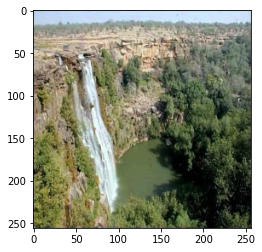

In [47]:

plt.imshow(Prediction/255)

TypeError: ignored

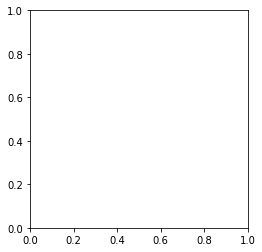

In [51]:
plt.imshow("/content/drive/MyDrive/lightinthedark/test/test/classify/1.JPG")